In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [10, 10]
import geopandas as gpd
from shapely.geometry import Point, Polygon

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [3]:
raw_cases = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
raw_deaths = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
raw_recovered = pd.read_csv('/home/andres/Documents/JupyterNBs/COVID_19_Data/JHUH_Data/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [4]:
raw_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,963,963,977,981,989,989,989,1005,1005,1024
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015


In [5]:
raw_cases.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 215 entries, Province/State to 8/19/20
dtypes: float64(2), int64(211), object(2)
memory usage: 446.9+ KB


In [6]:
raw_deaths.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Columns: 215 entries, Province/State to 8/19/20
dtypes: float64(2), int64(211), object(2)
memory usage: 446.9+ KB


In [7]:
geometry = [Point(xy) for xy in zip(raw_cases['Long'], raw_cases['Lat'])]

In [8]:
geometry[:3]

In [9]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [10]:
raw_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37162,37269,37345,37424,37431,37551,37596,37599,37599,37599
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,6536,6676,6817,6971,7117,7260,7380,7499,7654,7812
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,35712,36204,36699,37187,37664,38133,38583,39025,39444,39847
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,963,963,977,981,989,989,989,1005,1005,1024
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1679,1735,1762,1815,1852,1879,1906,1935,1966,2015


In [11]:
geo_cases = gpd.GeoDataFrame(raw_cases, geometry=geometry)

In [12]:
latest_cases = raw_cases.iloc[:,-2]

/home/andres/anaconda3/lib/python3.7/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))
No handles with labels found to put in legend.


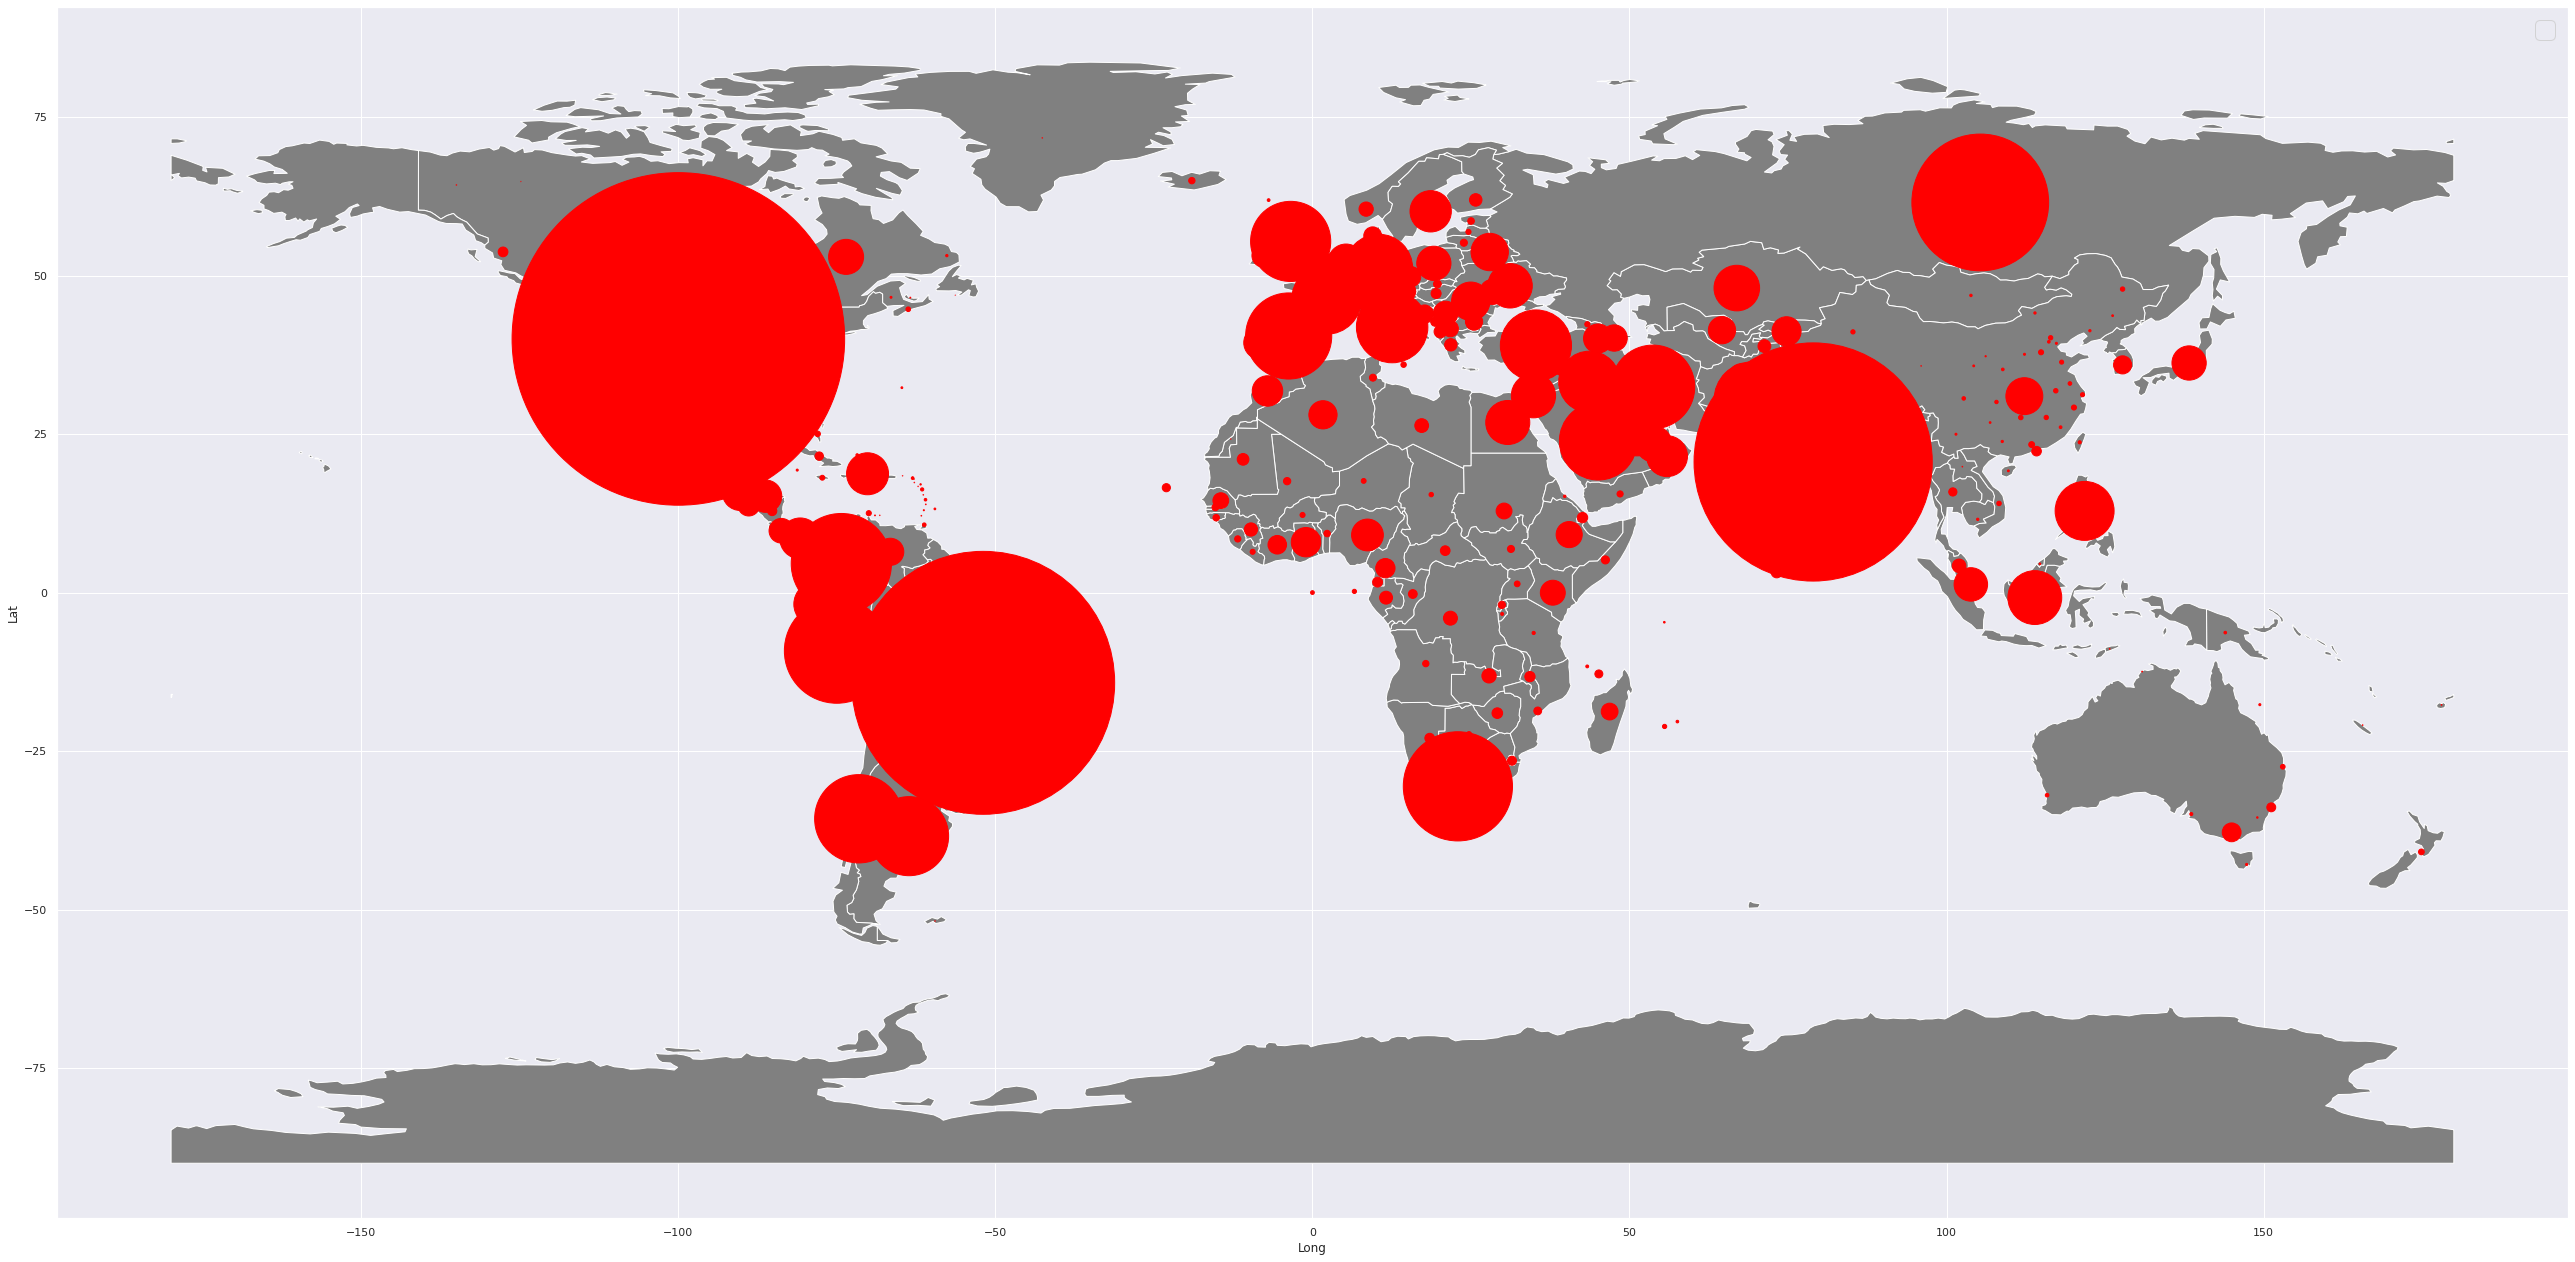

In [13]:
ax = world.plot(figsize=(45,35), color='grey')
geo_cases.crs = {'init' :'epsg:4326'}
geo_cases.to_crs(world.crs)
#geo_cases.plot(ax = ax, color='red')
raw_cases.plot(kind='scatter', x='Long', y='Lat', ax=ax, s=latest_cases/50, legend='Confirmed', color='red')
plt.legend(fontsize=25)
plt.show()

In [14]:


cases_no_states_no_geo = raw_cases.drop(['Province/State','Lat', 'Long'], axis=1)
deaths_no_states_no_geo = raw_deaths.drop(['Province/State', 'Lat', 'Long'], axis=1)
recovered_no_states_no_geo = raw_recovered.drop(['Province/State', 'Lat', 'Long'], axis=1)


In [15]:
grouped_cases = cases_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_deaths = deaths_no_states_no_geo.groupby('Country/Region', axis=0)
grouped_recovered = recovered_no_states_no_geo.groupby('Country/Region', axis=0)

In [16]:
cases_country_only = grouped_cases.sum()
deaths_country_only = grouped_deaths.sum()
recovered_country_only = grouped_recovered.sum()

In [17]:
#Final Data Frames including only countries which we want to study
names_we_want = ['Costa Rica', 'US', 'Italy', 'Spain', 'Germany', 'China', 'Brazil', 'Korea, South', 'France', 'Uruguay']
cases = cases_country_only.loc[names_we_want]
deaths = deaths_country_only.loc[names_we_want]
recovered = recovered_country_only.loc[names_we_want]
cases = cases.T
deaths = deaths.T
recovered = recovered.T

In [18]:
recovered

Country/Region,Costa Rica,US,Italy,Spain,Germany,China,Brazil,"Korea, South",France,Uruguay
1/22/20,0,0,0,0,0,28,0,0,0,0
1/23/20,0,0,0,0,0,30,0,0,0,0
1/24/20,0,0,0,0,0,36,0,0,0,0
1/25/20,0,0,0,0,0,39,0,0,0,0
1/26/20,0,0,0,0,0,49,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8/15/20,9010,1818527,203640,150376,200756,83108,2622878,13910,83993,1194
8/16/20,9062,1833067,203786,150376,201187,83200,2655017,13917,83993,1200
8/17/20,9233,1865580,203968,150376,202249,83283,2699080,13934,84214,1205
8/18/20,9462,1898159,204142,150376,203677,83408,2751246,14006,84214,1219


In [19]:
cases.to_csv('InternationalCases.csv', index=True)
deaths.to_csv('InternationalDeaths.csv', index=True)
recovered.to_csv('InternationalRecovered.csv', index=True)

In [20]:
cases_camcar = cases_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
deaths_camcar = deaths_country_only.loc[['Costa Rica', 'Panama', 'Guatemala', 'Nicaragua', 'El Salvador', 'Honduras', 'Dominican Republic', 'Jamaica', 'Trinidad and Tobago', 'Cuba']]
cases_camcar = cases_camcar.T
deaths_camcar = deaths_camcar.T

In [21]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8/15/20,27737,80665,62313,4115,22619,49979,85545,1082,497,3292
8/16/20,28465,81940,62562,4115,22912,50502,86309,1113,552,3316
8/17/20,29084,82543,62944,4115,23193,50995,86737,1129,588,3364
8/18/20,29643,82790,63847,4311,23462,51670,87123,1146,629,3408


In [22]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
1/22/20,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8/15/20,291,1746,2355,128,603,1567,1438,14,10,88
8/16/20,294,1767,2379,128,612,1575,1453,14,11,88
8/17/20,304,1788,2389,128,618,1583,1481,14,12,88
8/18/20,314,1809,2419,133,625,1593,1489,14,12,88


In [23]:
cases_camcar = cases_camcar.loc['2/29/20':]
deaths_camcar = deaths_camcar.loc['2/29/20':]

In [24]:
cases_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,1,0,0,0
3/2/20,0,0,0,0,0,0,1,0,0,0
3/3/20,0,0,0,0,0,0,1,0,0,0
3/4/20,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8/15/20,27737,80665,62313,4115,22619,49979,85545,1082,497,3292
8/16/20,28465,81940,62562,4115,22912,50502,86309,1113,552,3316
8/17/20,29084,82543,62944,4115,23193,50995,86737,1129,588,3364
8/18/20,29643,82790,63847,4311,23462,51670,87123,1146,629,3408


In [25]:
deaths_camcar

Country/Region,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0,0,0,0,0,0,0,0,0,0
3/1/20,0,0,0,0,0,0,0,0,0,0
3/2/20,0,0,0,0,0,0,0,0,0,0
3/3/20,0,0,0,0,0,0,0,0,0,0
3/4/20,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
8/15/20,291,1746,2355,128,603,1567,1438,14,10,88
8/16/20,294,1767,2379,128,612,1575,1453,14,11,88
8/17/20,304,1788,2389,128,618,1583,1481,14,12,88
8/18/20,314,1809,2419,133,625,1593,1489,14,12,88


In [26]:
cases_camcar.to_csv('CasesCAMCAR.csv', index=True)
deaths_camcar.to_csv('DeathsCAMCAR.csv', index=True)

In [27]:
def growth_factor_df(df):
    indices = df.index.values
    cols = df.columns.values
    zeros = np.zeros(df.shape)
    rows = df.shape[0]
    columns = df.shape[1]
    for j in range(columns):
        for i in range(1,rows):
            day_n = df.iloc[i,j]
            day_prev = df.iloc[i-1,j]
            if day_prev == 0:
                zeros[i,j] = 0
            else:
                zeros[i,j] = day_n/day_prev
    growth_df = pd.DataFrame(data=zeros, columns=cols, index=indices)
    return growth_df

In [28]:
camcar_gf = growth_factor_df(cases_camcar)

In [29]:
camcar_gf

,Costa Rica,Panama,Guatemala,Nicaragua,El Salvador,Honduras,Dominican Republic,Jamaica,Trinidad and Tobago,Cuba
2/29/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/1/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3/2/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/3/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3/4/20,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
8/15/20,1.029928,1.015906,1.014407,1.000000,1.013669,1.010350,1.012511,1.000000,1.166667,1.019511
8/16/20,1.026247,1.015806,1.003996,1.000000,1.012954,1.010464,1.008931,1.028651,1.110664,1.007290
8/17/20,1.021746,1.007359,1.006106,1.000000,1.012264,1.009762,1.004959,1.014376,1.065217,1.014475
8/18/20,1.019220,1.002992,1.014346,1.047631,1.011598,1.013237,1.004450,1.015058,1.069728,1.013080


In [30]:
camcar_gf.to_csv('GrowthFactorCAMCAR.csv', index=True)

In [31]:
temp = raw_cases[0 < raw_cases['Lat']]

In [32]:
temp = temp[ temp['Lat'] < 45]

In [33]:
temp = temp[-45 > temp['Long']]

In [34]:
temp = temp[temp['Long'] > -105]

In [35]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,92,92,92,93,93,93,93,93,94,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,989,1036,1089,1119,1252,1315,1329,1424,1531,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,143,144,144,148,150,151,152,153,155,POINT (-59.54320 13.19390)
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,177,210,296,356,388,452,475,475,553,POINT (-88.49760 17.18990)
47,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,1071,1071,1071,1072,1074,1074,1075,1075,1076,POINT (-63.74430 44.68200)
89,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,410453,422519,433805,445111,456689,468332,476660,489122,502178,POINT (-74.29730 4.57090)
93,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,24508,25057,26129,26931,27737,28465,29084,29643,30409,POINT (-83.75340 9.74890)
96,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,3093,3128,3174,3229,3292,3316,3364,3408,3482,POINT (-77.78117 21.52176)
104,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,POINT (-61.37100 15.41500)
105,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,81094,82224,83134,84488,85545,86309,86737,87123,88127,POINT (-70.16270 18.73570)


In [36]:
temp.drop([24,47,89,104,118,119,123,133,177,187, 210, 212, 229,242,246, 247, 248,254,255,259], axis=0, inplace=True)

In [37]:
temp

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20,geometry
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,92,92,92,93,93,93,93,93,94,POINT (-61.79640 17.06080)
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,989,1036,1089,1119,1252,1315,1329,1424,1531,POINT (-78.03589 25.02588)
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,143,144,144,148,150,151,152,153,155,POINT (-59.54320 13.19390)
93,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,24508,25057,26129,26931,27737,28465,29084,29643,30409,POINT (-83.75340 9.74890)
96,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,3093,3128,3174,3229,3292,3316,3364,3408,3482,POINT (-77.78117 21.52176)
105,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,81094,82224,83134,84488,85545,86309,86737,87123,88127,POINT (-70.16270 18.73570)
108,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,21269,21644,21993,22314,22619,22912,23193,23462,23717,POINT (-88.89650 13.79420)
116,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,8360,8423,8471,8549,8588,8588,8622,8657,8711,POINT (-53.12580 3.93390)
125,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,84,84,92,109,109,109,121,121,121,POINT (-63.05010 18.07080)
134,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,57966,59089,60284,61428,62313,62562,62944,63847,64881,POINT (-90.23080 15.78350)


In [38]:
len(temp)

22

In [39]:
cases_camcar_all = temp[['Province/State', 'Country/Region']]

In [40]:
cols = temp.columns.values
last_two_days = cols[-3:-1]
last_two_days[0]

'8/18/20'

In [41]:
cases_camcar_all[[last_two_days[0], last_two_days[1]]] = temp.iloc[:,-3:-1]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [42]:
cases_camcar_all = cases_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [43]:
cases_camcar_all = cases_camcar_all.drop('index', axis=1)

In [44]:
cases_camcar_all

,Province/State,Country/Region,8/18/20,8/19/20
0,NaN,Dominican Republic,87123,88127
1,NaN,Panama,82790,83754
2,NaN,Guatemala,63847,64881
3,NaN,Honduras,51670,52298
4,NaN,Costa Rica,29643,30409
5,NaN,El Salvador,23462,23717
6,French Guiana,France,8657,8711
7,NaN,Haiti,7921,7949
8,NaN,Nicaragua,4311,4311
9,NaN,Cuba,3408,3482


In [45]:
cases_camcar_all.to_csv('All_CAMCAR_Cases.csv', index=True)

In [46]:
temp_deaths = raw_deaths[0 < raw_deaths['Lat']]

In [47]:
temp_deaths = temp_deaths[ temp_deaths['Lat'] < 45]
temp_deaths = temp_deaths[-45 > temp_deaths['Long']]
temp_deaths = temp_deaths[temp_deaths['Long'] > -105]

In [48]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,15,15,15,15,17,17,18,19,20,22
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,2,2,2,2,3,3,3,4,4,4
47,Nova Scotia,Canada,44.682000,-63.744300,0,0,0,0,0,0,...,64,64,64,64,64,64,64,64,64,64
89,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,13154,13475,13837,14145,14492,14810,15097,15372,15619,15979
93,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,244,255,263,272,281,291,294,304,314,321
96,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,88,88,88,89,88,88,88,88,88,88
104,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
105,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,1328,1346,1371,1393,1409,1438,1453,1481,1489,1501


In [49]:
temp_deaths.drop([24,47,89,104,118,119,123,133,177,187, 210, 212, 229,242,246, 247, 248,254,255,259], axis=0, inplace=True)

In [50]:
temp_deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,15,15,15,15,17,17,18,19,20,22
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
93,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,244,255,263,272,281,291,294,304,314,321
96,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,88,88,88,89,88,88,88,88,88,88
105,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,1328,1346,1371,1393,1409,1438,1453,1481,1489,1501
108,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,563,570,577,584,595,603,612,618,625,633
116,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,49,49,50,51,53,53,53,53,53,54
125,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,3,4,4,4,4,4,4,5,5,5
134,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,2222,2233,2267,2296,2341,2355,2379,2389,2419,2467


In [51]:
deaths_camcar_all = temp_deaths[['Province/State', 'Country/Region']]

In [52]:
cols = temp_deaths.columns.values
last_two_days = cols[-2:]
last_two_days[0]

'8/18/20'

In [53]:
deaths_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_deaths.iloc[:,-2:]

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [54]:
deaths_camcar_all = deaths_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()

In [55]:
deaths_camcar_all = deaths_camcar_all.drop('index', axis=1)

In [56]:
deaths_camcar_all

,Province/State,Country/Region,8/18/20,8/19/20
0,NaN,Guatemala,2419,2467
1,NaN,Panama,1809,1827
2,NaN,Honduras,1593,1608
3,NaN,Dominican Republic,1489,1501
4,NaN,El Salvador,625,633
5,NaN,Costa Rica,314,321
6,NaN,Haiti,196,196
7,NaN,Nicaragua,133,133
8,NaN,Cuba,88,88
9,French Guiana,France,53,54


In [57]:
deaths_camcar_all.to_csv('All_CAMCAR_Deaths.csv', index=True)

In [58]:
temp_recovered = raw_recovered[0 < raw_recovered['Lat']]
temp_recovered = temp_recovered[ temp_recovered['Lat'] < 45]
temp_recovered = temp_recovered[-45 > temp_recovered['Long']]
temp_recovered = temp_recovered[temp_recovered['Long'] > -105]
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,76,76,76,76,83,83,88,88,88,88
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,113,116,122,138,138,160,189,191,203,209
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,112,112,115,118,119,121,122,122,122,123
24,NaN,Belize,17.189900,-88.497600,0,0,0,0,0,0,...,32,32,32,32,32,35,35,38,38,38
76,NaN,Colombia,4.570900,-74.297300,0,0,0,0,0,0,...,221484,230427,239785,250494,261293,274420,287436,301525,312323,326298
80,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,7823,7971,8189,8412,8785,9010,9062,9233,9462,9660
83,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2460,2472,2504,2525,2547,2568,2620,2692,2794,2863
91,NaN,Dominica,15.415000,-61.371000,0,0,0,0,0,0,...,18,18,18,18,18,18,18,18,18,18
92,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,44910,45666,47095,47946,49539,51356,52905,54108,55504,56760
95,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,9720,9875,10056,10254,10455,10618,10807,10977,11179,11388


In [59]:
temp_recovered.drop([24,76,91,105,106,110,120,164,174,197,199,216,229,233,235,241,242,246], axis=0, inplace=True) #'[ 41  82 109 113 115 158 190 204 232 233 244 249 250 251] not found in axis'


In [60]:
temp_recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,76,76,76,76,83,83,88,88,88,88
18,NaN,Bahamas,25.025885,-78.035889,0,0,0,0,0,0,...,113,116,122,138,138,160,189,191,203,209
21,NaN,Barbados,13.193900,-59.543200,0,0,0,0,0,0,...,112,112,115,118,119,121,122,122,122,123
80,NaN,Costa Rica,9.748900,-83.753400,0,0,0,0,0,0,...,7823,7971,8189,8412,8785,9010,9062,9233,9462,9660
83,NaN,Cuba,21.521757,-77.781167,0,0,0,0,0,0,...,2460,2472,2504,2525,2547,2568,2620,2692,2794,2863
92,NaN,Dominican Republic,18.735700,-70.162700,0,0,0,0,0,0,...,44910,45666,47095,47946,49539,51356,52905,54108,55504,56760
95,NaN,El Salvador,13.794200,-88.896500,0,0,0,0,0,0,...,9720,9875,10056,10254,10455,10618,10807,10977,11179,11388
103,French Guiana,France,3.933900,-53.125800,0,0,0,0,0,0,...,7549,7632,7713,7784,7841,7893,7893,7985,8054,8112
112,St Martin,France,18.070800,-63.050100,0,0,0,0,0,0,...,44,44,44,45,49,49,49,49,49,49
121,NaN,Guatemala,15.783500,-90.230800,0,0,0,0,0,0,...,45589,46442,47394,48305,49355,50183,50692,51530,52370,53362


In [61]:
recovered_camcar_all = temp_recovered[['Province/State', 'Country/Region']]
cols_rec = temp_recovered.columns.values
last_two_days = cols_rec[-2:]
last_two_days[0]

'8/18/20'

In [62]:
recovered_camcar_all[[last_two_days[0], last_two_days[1]]] = temp_recovered.iloc[:,-2:]
recovered_camcar_all = recovered_camcar_all.sort_values(by=[last_two_days[1]], ascending=False).reset_index()
recovered_camcar_all = recovered_camcar_all.drop('index', axis=1)
recovered_camcar_all

/home/andres/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Province/State,Country/Region,8/18/20,8/19/20
0,NaN,Panama,57191,58274
1,NaN,Dominican Republic,55504,56760
2,NaN,Guatemala,52370,53362
3,NaN,El Salvador,11179,11388
4,NaN,Costa Rica,9462,9660
5,French Guiana,France,8054,8112
6,NaN,Honduras,7661,7867
7,NaN,Haiti,5235,5337
8,NaN,Nicaragua,2913,2913
9,NaN,Cuba,2794,2863


In [63]:
recovered_camcar_all.to_csv('All_CAMCAR_Recovered.csv', index=True)

In [64]:
camcar_all_cases_no_geo = temp.drop(['Lat', 'Long', 'geometry'], axis=1)
camcar_all_deaths_no_geo = temp_deaths.drop(['Lat', 'Long'], axis=1)
camcar_all_recovered_no_geo = temp_recovered.drop(['Lat', 'Long'], axis=1)


In [65]:
camcar_all_cases_no_geo.reset_index(inplace=True, drop=True)
camcar_all_deaths_no_geo.reset_index(inplace=True, drop=True) 
camcar_all_recovered_no_geo.reset_index(inplace=True, drop=True)

In [66]:
names_camcar_all_cases_no_geo = camcar_all_cases_no_geo[camcar_all_cases_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_cases_no_geo.index
camcar_all_cases_no_geo.iloc[indices, 1] = names_camcar_all_cases_no_geo
camcar_all_cases_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_cases_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,92,92,92,92,93,93,93,93,93,94
1,Bahamas,0,0,0,0,0,0,0,0,0,...,945,989,1036,1089,1119,1252,1315,1329,1424,1531
2,Barbados,0,0,0,0,0,0,0,0,0,...,142,143,144,144,148,150,151,152,153,155
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,23872,24508,25057,26129,26931,27737,28465,29084,29643,30409
4,Cuba,0,0,0,0,0,0,0,0,0,...,3046,3093,3128,3174,3229,3292,3316,3364,3408,3482
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,80499,81094,82224,83134,84488,85545,86309,86737,87123,88127
6,El Salvador,0,0,0,0,0,0,0,0,0,...,20872,21269,21644,21993,22314,22619,22912,23193,23462,23717
7,French Guiana,0,0,0,0,0,0,0,0,0,...,8324,8360,8423,8471,8549,8588,8588,8622,8657,8711
8,St Martin,0,0,0,0,0,0,0,0,0,...,78,84,84,92,109,109,109,121,121,121
9,Guatemala,0,0,0,0,0,0,0,0,0,...,56987,57966,59089,60284,61428,62313,62562,62944,63847,64881


In [67]:
names_camcar_all_deaths_no_geo = camcar_all_deaths_no_geo[camcar_all_deaths_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_deaths_no_geo.index
camcar_all_deaths_no_geo.iloc[indices, 1] = names_camcar_all_deaths_no_geo
camcar_all_deaths_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_deaths_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
1,Bahamas,0,0,0,0,0,0,0,0,0,...,15,15,15,15,17,17,18,19,20,22
2,Barbados,0,0,0,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,244,255,263,272,281,291,294,304,314,321
4,Cuba,0,0,0,0,0,0,0,0,0,...,88,88,88,89,88,88,88,88,88,88
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,1328,1346,1371,1393,1409,1438,1453,1481,1489,1501
6,El Salvador,0,0,0,0,0,0,0,0,0,...,563,570,577,584,595,603,612,618,625,633
7,French Guiana,0,0,0,0,0,0,0,0,0,...,49,49,50,51,53,53,53,53,53,54
8,St Martin,0,0,0,0,0,0,0,0,0,...,3,4,4,4,4,4,4,5,5,5
9,Guatemala,0,0,0,0,0,0,0,0,0,...,2222,2233,2267,2296,2341,2355,2379,2389,2419,2467


In [68]:
names_camcar_all_recovered_no_geo = camcar_all_recovered_no_geo[camcar_all_recovered_no_geo['Province/State'].notna()].iloc[:,0]
indices = names_camcar_all_recovered_no_geo.index
camcar_all_recovered_no_geo.iloc[indices, 1] = names_camcar_all_recovered_no_geo
camcar_all_recovered_no_geo.drop('Province/State', axis=1, inplace=True)
camcar_all_recovered_no_geo

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,8/10/20,8/11/20,8/12/20,8/13/20,8/14/20,8/15/20,8/16/20,8/17/20,8/18/20,8/19/20
0,Antigua and Barbuda,0,0,0,0,0,0,0,0,0,...,76,76,76,76,83,83,88,88,88,88
1,Bahamas,0,0,0,0,0,0,0,0,0,...,113,116,122,138,138,160,189,191,203,209
2,Barbados,0,0,0,0,0,0,0,0,0,...,112,112,115,118,119,121,122,122,122,123
3,Costa Rica,0,0,0,0,0,0,0,0,0,...,7823,7971,8189,8412,8785,9010,9062,9233,9462,9660
4,Cuba,0,0,0,0,0,0,0,0,0,...,2460,2472,2504,2525,2547,2568,2620,2692,2794,2863
5,Dominican Republic,0,0,0,0,0,0,0,0,0,...,44910,45666,47095,47946,49539,51356,52905,54108,55504,56760
6,El Salvador,0,0,0,0,0,0,0,0,0,...,9720,9875,10056,10254,10455,10618,10807,10977,11179,11388
7,French Guiana,0,0,0,0,0,0,0,0,0,...,7549,7632,7713,7784,7841,7893,7893,7985,8054,8112
8,St Martin,0,0,0,0,0,0,0,0,0,...,44,44,44,45,49,49,49,49,49,49
9,Guatemala,0,0,0,0,0,0,0,0,0,...,45589,46442,47394,48305,49355,50183,50692,51530,52370,53362


In [69]:
camcar_all_cases_no_geo.set_index('Country/Region', inplace=True)
camcar_all_deaths_no_geo.set_index('Country/Region', inplace=True)
camcar_all_recovered_no_geo.set_index('Country/Region', inplace=True)

In [70]:
cases_camcar_all = camcar_all_cases_no_geo.T.loc['2/29/20':]
deaths_camcar_all = camcar_all_deaths_no_geo.T.loc['2/29/20':]
recovered_camcar_all = camcar_all_recovered_no_geo.T.loc['2/29/20':]

In [71]:
cases_camcar_all.to_csv('Cases_Time_Series_CAMCAR_All.csv', index=True)
deaths_camcar_all.to_csv('Deaths_Time_Series_CAMCAR_All.csv', index=True)
recovered_camcar_all.to_csv('Recovered_Time_Series_CAMCAR_All.csv', index=True)

In [72]:
gf_camcar_all = growth_factor_df(cases_camcar_all)
gf_camcar_all.to_csv('Growth_Factor_CAMCAR_All.csv', index=True)

In [73]:
active_camcar_all = cases_camcar_all - deaths_camcar_all - recovered_camcar_all
active_camcar_all.to_csv('Active_CAMCAR_All.csv', index=True)

In [74]:
cases_camcar_all.shape

(173, 22)

In [75]:
recovered_camcar_all.shape

(173, 23)

In [76]:
deaths_camcar_all.shape

(173, 22)

In [77]:
active_camcar_all.shape

(173, 23)